In [45]:
import matplotlib.pyplot as plt

In [2]:
import torch 
torch.__version__

'2.0.1+cu118'

In [7]:
cuda0 = torch.device("cuda:0")

In [9]:
x = torch.ones([1,2], dtype=torch.float64, device=cuda0)

### Check if my tensor stored in cuda or not

In [10]:
x.is_cuda

True

In [12]:
# Create scalar tensor
scalar = torch.tensor(7)
scalar

tensor(7)

In [13]:
# Check the scalar tensor dimension
scalar.ndim

0

In [14]:
# Get the value from the tensor variable
scalar.item()

7

In [17]:
vector = torch.tensor([1,2,3], dtype=torch.float64, device=cuda0)

In [18]:
vector

tensor([1., 2., 3.], device='cuda:0', dtype=torch.float64)

In [19]:
vector.ndim

1

In [20]:
vector.shape

torch.Size([3])

In [31]:
MATRIX = torch.tensor([[1,2],
                       [3,4],
                      [5,6]], dtype=torch.int32, device=cuda0)

In [32]:
MATRIX.ndim

2

In [33]:
MATRIX.shape

torch.Size([3, 2])

In [34]:
MATRIX

tensor([[1, 2],
        [3, 4],
        [5, 6]], device='cuda:0', dtype=torch.int32)

In [35]:
# n-dimensional array 
TENSOR = torch.tensor([[[1,2,3],
                       [4,5,6],
                        [7,8,9]]])

In [36]:
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [37]:
TENSOR.shape

torch.Size([1, 3, 3])

In [38]:
# Initial random tensor
SIZE = (3,3)
random_tensor = torch.rand(size=SIZE)

In [41]:
random_tensor ,random_tensor.shape, random_tensor.dtype

(tensor([[0.7145, 0.8783, 0.7647],
         [0.5364, 0.3106, 0.8854],
         [0.7745, 0.9624, 0.2666]]),
 torch.Size([3, 3]),
 torch.float32)

In [46]:
# Create a 3 channel image like random tensor
SIZE = (250, 250, 3)
random_image_tensor = torch.rand(size=SIZE)

### Visualize the random image like tensor using matplotlib

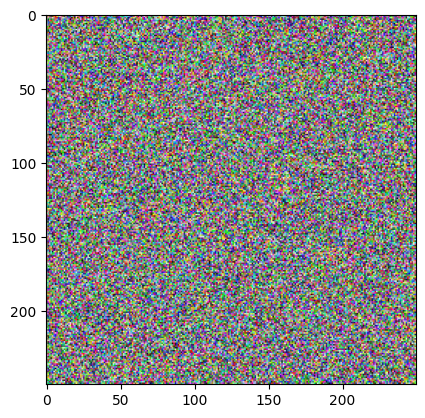

In [47]:
plt.imshow(random_image_tensor)
plt.show()

In [49]:
zeros = torch.zeros(size=(2,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [50]:
ones = torch.ones(size=(3,2))
ones

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [51]:
# Creating a tensor ones with random tensor image shape
image_masking = torch.ones_like(random_image_tensor)


torch.Size([250, 250, 3])

In [52]:
# Element wise multiplication
tensor = torch.tensor([[1, 2],
                         [2, 3]])
    
tensor*tensor 

tensor([[1, 4],
        [4, 9]])

In [57]:
# Matrix multiplication
%time
torch.mm(tensor, tensor)

CPU times: total: 0 ns
Wall time: 0 ns


tensor([[ 5,  8],
        [ 8, 13]])

# Torch aggregation

In [67]:
vector = torch.arange(0, 100, 15)
vector

tensor([ 0, 15, 30, 45, 60, 75, 90])

In [68]:
print(f"Minimun of the vector {vector.min()}")
print(f"Maximum of the vector {vector.max()}")
print(f"Summation of the vector {vector.sum()}")
print(f"Mean of the vector {vector.type(torch.float32).mean()}")

Minimun of the vector 0
Maximum of the vector 90
Summation of the vector 315
Mean of the vector 45.0


In [69]:
print(f"Minimun of the vector {vector.argmin()}")
print(f"Minimun of the vector {vector.argmax()}")

Minimun of the vector 0
Minimun of the vector 6


# Shaping the tensor

In [91]:
vector_stack = torch.stack([vector, vector], dim=1)
vector_stack, vector_stack.shape

(tensor([[ 0,  0],
         [15, 15],
         [30, 30],
         [45, 45],
         [60, 60],
         [75, 75],
         [90, 90]]),
 torch.Size([7, 2]))

# Tensors vs Numpy

In [92]:
import numpy as np

numpy_array = np.array([1,2,3])
tensor = torch.from_numpy(numpy_array)
numpy_array, tensor

(array([1, 2, 3]), tensor([1, 2, 3], dtype=torch.int32))

In [96]:
tensor = torch.zeros(7)
to_numpy_array = tensor.numpy()
tensor, to_numpy_array

(tensor([0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0.], dtype=float32))

# Random seeds

In [98]:
torch.manual_seed(seed=45)
random_A = torch.rand(2,3)

torch.manual_seed(seed=45)
random_B = torch.rand(2,3)

random_A == random_B

tensor([[True, True, True],
        [True, True, True]])

# Checking my gpu

In [99]:
!nvidia-smi

Sun Jun 11 03:36:25 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.61                 Driver Version: 531.61       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070       WDDM | 00000000:01:00.0  On |                  N/A |
|  0%   43C    P8               11W / 200W|    364MiB / 12282MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Running pytorch in gpu


In [101]:
torch.cuda.is_available()

True

In [102]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [103]:
torch.cuda.device_count()

1

# Playing with gpu and cpu tensor

In [104]:
tensor = torch.ones(7)
tensor_to_gpu = tensor.to(device)
tensor_to_gpu

tensor([1., 1., 1., 1., 1., 1., 1.], device='cuda:0')

In [105]:
tensor_back_to_cpu = tensor_to_gpu.cpu().numpy()
tensor_back_to_cpu

array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)